# Fraud Detection

## Honour Code

I JACOB, KHOZA, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


sns.set()
%matplotlib inline

## Importing the data set

In [2]:
train_df = pd.read_csv('training.csv')
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [4]:
df = pd.concat([train_df,test_df],sort=False)

## Exploratory Data Analysis

Let us look for any missing values. It appears that there are no missing values for this dataset. 

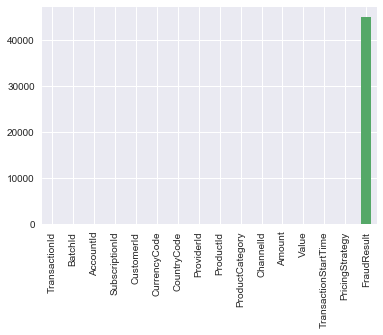

In [5]:
df.isnull().sum().plot.bar()

In [6]:
df.describe(include='all')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,140681,140681,140681,140681,140681,140681,140681.0,140681,140681,140681,140681,1.406810e+05,1.406810e+05,140681,140681.000000,95662.000000
unique,140681,139493,4841,4836,7479,1,NaN,6,27,10,5,NaN,NaN,138574,NaN,NaN
top,TransactionId_50947,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,42334,47833,4091,140681,NaN,56445,47821,67105,95025,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.050578e+03,1.002851e+04,NaN,2.257469,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.153134e+05,1.150626e+05,NaN,0.735089,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-2.500000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,3.920000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,3.000000e+03,5.000000e+03,NaN,2.000000,0.000000


## Splitting Between Fraudulent and non-fraudulent Transactions

In [7]:
fraud_df = train_df[train_df['FraudResult'] == 1]
fraud_df.describe(include='all')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,193,193,193,193,193,193,193.0,193,193,193,193,1.930000e+02,1.930000e+02,193,193.000000,193.0
unique,193,183,52,52,54,1,NaN,5,9,4,3,NaN,NaN,193,NaN,NaN
top,TransactionId_88846,BatchId_126656,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,NaN,ProviderId_3,ProductId_15,financial_services,ChannelId_3,NaN,NaN,2019-02-06T09:10:06Z,NaN,NaN
freq,1,4,31,31,31,193,NaN,64,157,161,184,NaN,NaN,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.535272e+06,1.561820e+06,NaN,1.704663,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2.100525e+06,2.081227e+06,NaN,0.963300,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-9.000000e+05,5.000000e+02,NaN,0.000000,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,5.000000e+05,5.000000e+05,NaN,2.000000,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.000000e+05,6.500000e+05,NaN,2.000000,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.000000e+06,2.000000e+06,NaN,2.000000,1.0


In [8]:
legit_df = train_df[train_df['FraudResult'] == 0]
legit_df.describe(include='all')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95469,95469,95469,95469,95469,95469,95469.0,95469,95469,95469,95469,9.546900e+04,9.546900e+04,95469,95469.000000,95469.0
unique,95469,94627,3623,3617,3731,1,NaN,6,23,9,4,NaN,NaN,94366,NaN,NaN
top,TransactionId_93959,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30892,32629,4091,95469,NaN,38184,32634,45244,56751,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,3.627723e+03,6.763227e+03,NaN,2.257089,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.035711e+04,3.999484e+04,NaN,0.731971,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.500000e+02,NaN,2.000000,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.500000e+03,5.000000e+03,NaN,2.000000,0.0


In [9]:
fraud_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:04:51Z,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15T08:20:09Z,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:31:57Z,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T09:15:23Z,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T11:49:46Z,0,1


In [10]:
legit_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Pricing Strategy

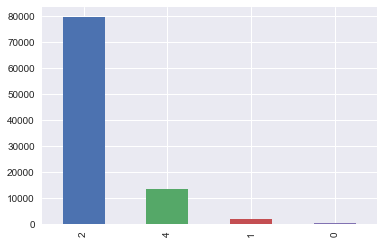

In [11]:
legit_df.PricingStrategy.value_counts().plot.bar()

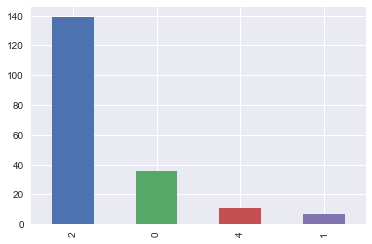

In [12]:
fraud_df.PricingStrategy.value_counts().plot.bar()

### Product Category 

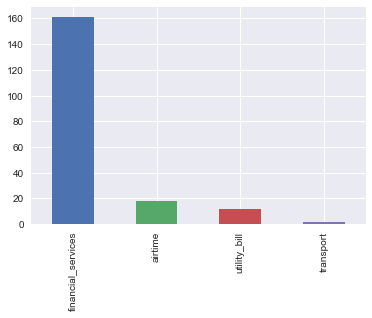

In [13]:
fraud_df.ProductCategory.value_counts().plot.bar()

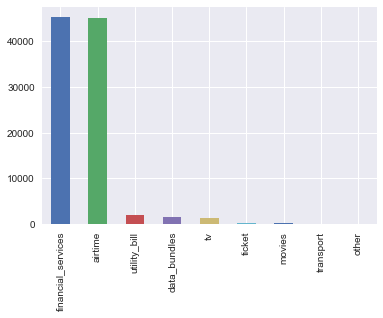

In [14]:
legit_df.ProductCategory.value_counts().plot.bar()

### Product Id 

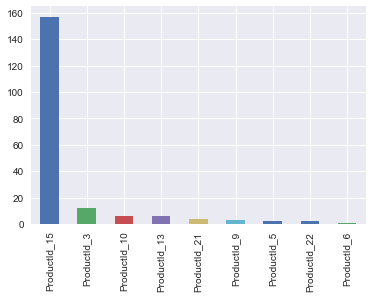

In [15]:
fraud_df.ProductId.value_counts().plot.bar()

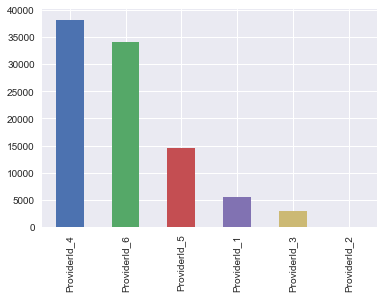

In [16]:
legit_df.ProviderId.value_counts().plot.bar()

It appears as if there is a clear indication as to which providers are fraudulent transactions coming from. This is easily visible since some providers tend not to have fraudulent transactions coming from them

### Channel Id

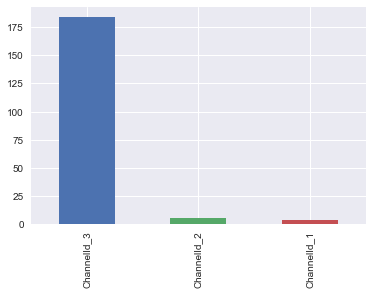

In [17]:
fraud_df.ChannelId.value_counts().plot.bar()

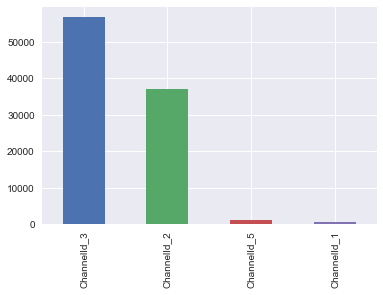

In [18]:
legit_df.ChannelId.value_counts().plot.bar()

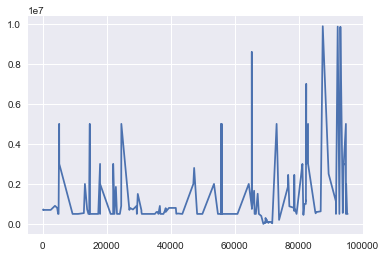

In [19]:
fraud_df['Value'].plot()

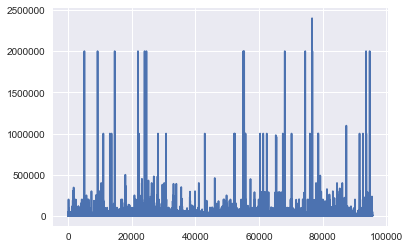

In [20]:
legit_df['Value'].plot()

## Feature Engineering 

In [21]:
df['TotalUserTransactions'] = df.groupby('CustomerId').transform('count')['TransactionId']

In [22]:
df['TotalUserAccounts'] = df.groupby(['CustomerId','AccountId']).transform('count')['TransactionId']

In [23]:
cols = list(dict(df.dtypes[df.dtypes == object]).keys())
cols.remove('ProductCategory')
cols.remove('TransactionStartTime')
cols.remove('CurrencyCode')
cols

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ChannelId']

In [24]:
for col in cols:
    df[col] = df[col].apply(lambda x:x.split('_')[1])
    df[col] = df[col].astype(int)

In [25]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TotalUserTransactions,TotalUserAccounts
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0.0,152,82
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0.0,152,42
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0.0,2,2
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0.0,55,36
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0.0,55,17


Let us create features off our date time variable. We will extract multiple features and see if that will give us more accurate results. Before we can do that, we need to convert this variable into a datetime object. Let us go ahead.

In [26]:
df.TransactionStartTime = pd.to_datetime(df.TransactionStartTime)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140681 entries, 0 to 45018
Data columns (total 18 columns):
TransactionId            140681 non-null int32
BatchId                  140681 non-null int32
AccountId                140681 non-null int32
SubscriptionId           140681 non-null int32
CustomerId               140681 non-null int32
CurrencyCode             140681 non-null object
CountryCode              140681 non-null int64
ProviderId               140681 non-null int32
ProductId                140681 non-null int32
ProductCategory          140681 non-null object
ChannelId                140681 non-null int32
Amount                   140681 non-null float64
Value                    140681 non-null int64
TransactionStartTime     140681 non-null datetime64[ns]
PricingStrategy          140681 non-null int64
FraudResult              95662 non-null float64
TotalUserTransactions    140681 non-null int64
TotalUserAccounts        140681 non-null int64
dtypes: datetime64[ns](1), flo

In [28]:
#extracting datetime features
df['Month'] = df.TransactionStartTime.dt.month
df['Year'] = df.TransactionStartTime.dt.year
df['Day'] = df.TransactionStartTime.dt.day
df['DayOfYear'] = df.TransactionStartTime.dt.dayofyear
df['DayOfWeek'] = df.TransactionStartTime.dt.dayofweek
df['isMonthEnd'] = df.TransactionStartTime.dt.is_month_end
df['isMonthStart'] = df.TransactionStartTime.dt.is_month_start
df['isYearEnd'] = df.TransactionStartTime.dt.is_year_end
df['isYearStart'] = df.TransactionStartTime.dt.is_year_start
df['isQuarterEnd'] = df.TransactionStartTime.dt.is_quarter_end
df['isQuaterStart'] = df.TransactionStartTime.dt.is_quarter_start
df['isLeapYear'] = df.TransactionStartTime.dt.is_leap_year
df['Weekday'] = df.TransactionStartTime.dt.weekday
df['Hour'] = df.TransactionStartTime.dt.hour
df['Minute'] = df.TransactionStartTime.dt.second
df['WeekOfYear'] = df.TransactionStartTime.dt.weekofyear
df['Quarter'] = df.TransactionStartTime.dt.quarter

In [29]:
df.drop('TransactionStartTime',axis=1,inplace=True)

Now we are going to convert our product category into One-Hot-Ecoded variables.

In [30]:
df = pd.get_dummies(df,columns=['ProductCategory'],drop_first=True)

In [31]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,Quarter,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,76871,36123,3957,887,4406,UGX,256,6,10,3,...,4,0,0,0,0,0,0,0,0,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,2,...,4,0,1,0,0,0,0,0,0,0
2,26203,53941,4229,222,4683,UGX,256,6,1,3,...,4,0,0,0,0,0,0,0,0,0
3,380,102363,648,2185,988,UGX,256,1,21,3,...,4,0,0,0,0,0,0,0,0,1
4,28195,38780,4841,3829,988,UGX,256,4,6,2,...,4,0,1,0,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140681 entries, 0 to 45018
Data columns (total 42 columns):
TransactionId                         140681 non-null int32
BatchId                               140681 non-null int32
AccountId                             140681 non-null int32
SubscriptionId                        140681 non-null int32
CustomerId                            140681 non-null int32
CurrencyCode                          140681 non-null object
CountryCode                           140681 non-null int64
ProviderId                            140681 non-null int32
ProductId                             140681 non-null int32
ChannelId                             140681 non-null int32
Amount                                140681 non-null float64
Value                                 140681 non-null int64
PricingStrategy                       140681 non-null int64
FraudResult                           95662 non-null float64
TotalUserTransactions                 140681 n

## Splitting the data into Train, Validation and Test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_len = len(train_df)
train_df = df.iloc[:train_len,:]
test_df = df.iloc[train_len:,:]

In [35]:
cols_to_drop = ['CurrencyCode','CustomerId','CountryCode','FraudResult']

In [36]:
X = train_df.drop(columns=cols_to_drop,axis=1)
y = train_df['FraudResult']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y)

**Standardizing the values**

In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
scaler = RobustScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
X_test_scaled = scaler.transform(X_test) 

### Dealing with data imbalances

In [42]:
from imblearn.over_sampling import SMOTE,RandomOverSampler

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [43]:
sampler = SMOTE(ratio=0.15)

In [44]:
X_train_scaled, y_train = sampler.fit_resample(X_train_scaled,y_train)

## Fitting Models

In [45]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

##### Logistic Regression

In [46]:
log_reg = LogisticRegressionCV(class_weight = None,
    fit_intercept = False,
    verbose = 0,
    solver= 'liblinear')

In [47]:
log_params ={
    'C':[0.1,1,10,100,0.001],
    'class_weight': [None,'balanced'],
    'fit_intercept': [True,False],
    'verbose': [0,1],
    'warm_start' : [False,True]
}

In [48]:
gridCV = GridSearchCV(log_reg,log_params,cv=5)

In [49]:
log_reg.fit(X_train_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=False, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [50]:
print(classification_report(y_test,log_reg.predict(X_test_scaled)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38188
         1.0       0.46      0.94      0.62        77

    accuracy                           1.00     38265
   macro avg       0.73      0.97      0.81     38265
weighted avg       1.00      1.00      1.00     38265



##### RandomForeset

In [51]:
rf = RandomForestClassifier(random_state=0,n_estimators=200)

In [52]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
print(classification_report(y_test,rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38188
         1.0       0.78      0.90      0.83        77

    accuracy                           1.00     38265
   macro avg       0.89      0.95      0.92     38265
weighted avg       1.00      1.00      1.00     38265



**It appears as if we are classifing more transactions as fraudulent when they are not. Let us use less features to see if we cannot improve our predictions.**

### Feature Selection

In [54]:
fi_df = pd.DataFrame(rf.feature_importances_*100,X_train.columns).reset_index()

In [55]:
fi_df.columns = ['Feature','Importance']
new_cols = fi_df.sort_values('Importance',ascending=False).head(8).Feature.values

In [56]:
X = train_df[new_cols]
y = train_df['FraudResult']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y)

**Standardizing the values**

In [58]:
X_train_scaled = scaler.fit_transform(X_train)

In [59]:
X_test_scaled = scaler.transform(X_test) 

In [60]:
X_train_scaled, y_train = sampler.fit_resample(X_train_scaled,y_train)

In [61]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
print(classification_report(y_test,rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38188
         1.0       0.80      0.96      0.87        77

    accuracy                           1.00     38265
   macro avg       0.90      0.98      0.94     38265
weighted avg       1.00      1.00      1.00     38265



In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

## Creating submission file

In [64]:
test_X = test_df[new_cols]

In [65]:
test_X_scaled = scaler.transform(test_X)

In [66]:
test_df['FraudResult'] = rf.predict(test_X_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
test_df.TransactionId = test_df.TransactionId.apply(lambda x: 'TransactionId_' +  str(x))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [68]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,Quarter,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_50600,35028,2441,4426,2857,UGX,256,5,3,3,...,1,0,0,0,0,0,0,0,0,0
1,TransactionId_95109,45139,3439,2643,3874,UGX,256,5,15,3,...,1,0,1,0,0,0,0,0,0,0
2,TransactionId_47357,74887,4841,3829,2857,UGX,256,4,6,2,...,1,0,1,0,0,0,0,0,0,0
3,TransactionId_28185,11025,2685,4626,3105,UGX,256,5,10,3,...,1,0,0,0,0,0,0,0,0,0
4,TransactionId_22140,29804,4841,3829,3105,UGX,256,4,6,2,...,1,0,1,0,0,0,0,0,0,0


In [69]:
test_df[['TransactionId','FraudResult']].to_csv('zindi_fraud.csv',index=False)

In [70]:
X_train.head()

,Value,Amount,ProviderId,ProductId,ProductCategory_financial_services,PricingStrategy,ChannelId,SubscriptionId
129,1000,1000.0,6,3,0,2,3,652
52791,30000,-30000.0,4,3,0,4,2,4429
62887,10000,10000.0,6,10,0,2,3,3946
82780,5000,-5000.0,4,6,1,2,2,3829
19923,3500,3500.0,1,15,1,2,3,3150
